In [1]:
cd ..

/Users/odatakuma/cmu/FleetAI


In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import cPickle as pickle
import time
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from experiment import describe

In [7]:
OUTPUT_PATH = 'data/nyc_taxi/trips/tripdata_2016-05.csv'
df = pd.read_csv(OUTPUT_PATH)
df.head()

,date,dayofweek,dlat,dlon,hour,minute,plat,plon,second,trip_distance,trip_time,great_circle_distance,great_circle_speed,phash,dhash
0,1,6,40.730099,-73.983986,0,0,40.768040,-73.985901,0,3.60,17.516667,4221,14.458230,dr5rumt,dr5rsqw
1,1,6,40.744633,-73.980995,0,0,40.741573,-73.993073,0,1.09,7.016667,1072,9.166746,dr5ru0z,dr5ru92
2,1,6,40.733002,-74.002258,0,0,40.684601,-73.991943,0,4.21,19.783333,5451,16.532098,dr5rkq2,dr5rsp1
3,1,6,40.737564,-73.997498,0,0,40.740192,-74.005280,0,0.56,6.650000,717,6.469173,dr5rgbw,dr5ru0h
4,1,6,40.758469,-73.988014,0,0,40.755764,-73.979294,0,0.63,5.316667,793,8.949216,dr5rue3,dr5ru7g


In [8]:
demand = df.groupby(['phash'])[['minute']].count().rename(columns={'minute':'count'})
demand.head()

,count
phash,
dr5qgxz,1
dr5qgz2,1
dr5qgz5,3
dr5qgz7,1
dr5qgz8,1


In [9]:
geohash_table = pd.read_csv("data/table/zones.csv", index_col='geohash')
geohash_table['demand'] = demand

In [11]:
demand = geohash_table.fillna(0).groupby('taxi_zone')['demand'].sum()
demand.head()

taxi_zone
2      206
3    39502
6    89765
7      329
8       45
Name: demand, dtype: float64

In [18]:
import geopandas as gpd

nyc = gpd.read_file("data/nyc_taxi/taxi_zones/taxi_zones.shp").to_crs('+proj=latlon')
nyc = nyc[(nyc.borough != 'EWR')&(nyc.borough != 'Staten Island')]
nyc['demand'] = np.sqrt(demand)
nyc = nyc.fillna(0)

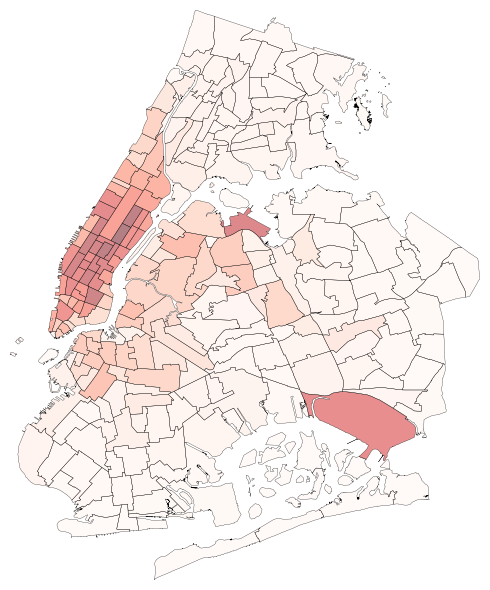

In [22]:
plt.clf()
fig = plt.figure(figsize=(5, 6), dpi=100)
ax = fig.add_subplot(111, axisbg='w', frame_on=False)
ax.set_xticks([])
ax.set_yticks([])
nyc.plot(column='demand', cmap="Reds", axes=ax, linewidth=0.2)
plt.tight_layout();

In [32]:
df = df[df.trip_distance < 5.0/1.6]
speed = df.trip_distance / df.trip_time * 60 * 1.6
speed = speed[speed< 50]
speed.describe()

count    9444474.000000
mean          15.761552
std            6.385509
min            0.078581
25%           11.232936
50%           14.988848
75%           19.280335
max           49.997970
dtype: float64

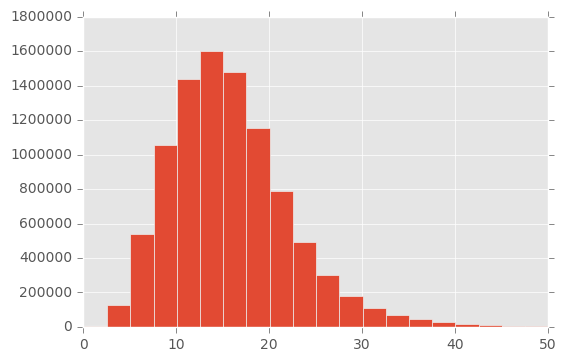

In [33]:
speed.hist(bins=20)